<a href="https://colab.research.google.com/github/wahyunugroho424/proyek-analisis-data/blob/main/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Wahyu Nugroho
- **Email:** wahyumnapaham2gmail.com
- **ID Dicoding:** MC131D5Y0138

## Menentukan Pertanyaan Bisnis

1.   Analisis total pemesanan dan rata rata pemesanan
2.   Analisis produk terlaris
3.   Analisis jumlah pelanggan bedasarkan customer_state


  - Bagaimana tren jumlah pesanan harian?
  - Produk apa yang paling laris dan kurang laku?
  - Bagaimana distribusi jumlah pelanggan berdasarkan provinsi?

## Import Semua Packages/Library yang Digunakan

In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## **Data Wrangling**

### **Garhering Data**

In [ ]:
#1. Gathering Data
print("Gathering Data")
print("")
print("data costumer")
print("-"*15)
customers_df = pd.read_csv("https://raw.githubusercontent.com/wahyunugroho424/proyek-analisis-data/main/data/customers_dataset.csv")
customers_df.head()

Gathering Data

data costumer
---------------


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [ ]:
print("Gathering Data")
print("")
print("data geolocation")
print("-"*15)
geolocation_df = pd.read_csv("https://raw.githubusercontent.com/wahyunugroho424/proyek-analisis-data/main/data/geolocation_dataset.csv")
geolocation_df.head()

Gathering Data

data geolocation
---------------


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [ ]:
print("Gathering Data")
print("")
print("orders items")
print("-"*15)
orders_item_df = pd.read_csv("https://raw.githubusercontent.com/wahyunugroho424/proyek-analisis-data/main/data/order_items_dataset.csv")
orders_item_df.head()

Gathering Data

orders items
---------------


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [ ]:
print("Gathering Data")
print("")
print("data order payments")
print("-"*15)
payments_df = pd.read_csv("https://raw.githubusercontent.com/wahyunugroho424/proyek-analisis-data/main/data/order_payments_dataset.csv")
payments_df.head()

Gathering Data

data order payments
---------------


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [ ]:
print("Gathering Data")
print("")
print("data reviews")
print("-"*15)
reviews_df = pd.read_csv("https://raw.githubusercontent.com/wahyunugroho424/proyek-analisis-data/main/data/order_reviews_dataset.csv")
customers_df.head()

Gathering Data

data reviews
---------------


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [ ]:
print("Gathering Data")
print("")
print("data orders")
print("-"*15)
orders_df = pd.read_csv("https://raw.githubusercontent.com/wahyunugroho424/proyek-analisis-data/main/data/orders_dataset.csv")
orders_df.head()

Gathering Data

data orders
---------------


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [ ]:
print("Gathering Data")
print("")
print("data produk kategory")
print("-"*15)
produk_kategori_df = pd.read_csv("https://raw.githubusercontent.com/wahyunugroho424/proyek-analisis-data/main/data/product_category_name_translation.csv")
produk_kategori_df.head()

Gathering Data

data produk kategory
---------------


,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [94]:
print("Gathering Data")
print("")
print("data produk")
print("-"*15)
produk_df = pd.read_csv("https://raw.githubusercontent.com/wahyunugroho424/proyek-analisis-data/main/data/products_dataset.csv")
produk_df.head()

Gathering Data

data produk
---------------


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [ ]:
print("Gathering Data")
print("")
print("data sellers")
print("-"*15)
sellers_df = pd.read_csv("https://raw.githubusercontent.com/wahyunugroho424/proyek-analisis-data/main/data/sellers_dataset.csv")
sellers_df.head()

Gathering Data

data sellers
---------------


,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [ ]:
print("Gathering Data")
print("")
print("all_data")
print("-"*15)
url = "https://github.com/wahyunugroho424/proyek-analisis-data/raw/main/dashboard/all_data.xlsx"
df = pd.read_excel(url, engine="openpyxl")
df.head()


Gathering Data

all_data
---------------


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,payment_installments,payment_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,1.0,18.12,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,1.0,2.00,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,1.0,18.59,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,...,1.0,141.46,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,...,3.0,179.12,automotivo,46.0,232.0,1.0,420.0,24.0,19.0,21.0


### **Assessing Data**

#### Menilai tabel customoers

In [ ]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


#### Informasi terkait missing value

In [ ]:
print("informasi terkait jumlah missing values")
print("-"*15)
customers_df.isna().sum()

informasi terkait jumlah missing values
---------------


,0
customer_id,0
customer_unique_id,0
customer_zip_code_prefix,0
customer_city,0
customer_state,0


##### memeriksa duplikasi

In [108]:
print(""*15)
print("Jumlah duplikasi: ", customers_df.duplicated().sum())


Jumlah duplikasi:  0


###### Ringkasan pada all_data

In [109]:
customers_df.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474683
std,29797.939215
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,100000.000000


#### Menilai tabel geolocation

In [ ]:
geolocation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [ ]:
print("informasi terkait jumlah missing values")
print("-"*15)
geolocation_df.isna().sum()

informasi terkait jumlah missing values
---------------


,0
customer_id,0
customer_unique_id,0
customer_zip_code_prefix,0
customer_city,0
customer_state,0


In [ ]:
print(""*15)
print("Jumlah duplikasi: ", geolocation_df.duplicated().sum())


Jumlah duplikasi:  0


In [ ]:
geolocation_df.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


#### Menilai tabel orders_items

In [ ]:
orders_item_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [ ]:
print("informasi terkait jumlah missing values")
print("-"*15)
orders_item_df.isna().sum()

informasi terkait jumlah missing values
---------------


,0
order_id,0
order_item_id,0
product_id,0
seller_id,0
shipping_limit_date,0
price,0
freight_value,0


In [ ]:
print(""*15)
print("Jumlah duplikasi: ", orders_item_df.duplicated().sum())


Jumlah duplikasi:  0


In [ ]:
orders_item_df.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


### Menilai tabel orders_payments

In [ ]:
payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [ ]:
print("informasi terkait jumlah missing values")
print("-"*15)
payments_df.isna().sum()

informasi terkait jumlah missing values
---------------


,0
order_id,0
payment_sequential,0
payment_type,0
payment_installments,0
payment_value,0


In [ ]:
print(""*15)
print("Jumlah duplikasi: ", payments_df.duplicated().sum())


Jumlah duplikasi:  0


In [ ]:
print(payments_df.describe())

       payment_sequential  payment_installments  payment_value
count       103886.000000         103886.000000  103886.000000
mean             1.092679              2.853349     154.100380
std              0.706584              2.687051     217.494064
min              1.000000              0.000000       0.000000
25%              1.000000              1.000000      56.790000
50%              1.000000              1.000000     100.000000
75%              1.000000              4.000000     171.837500
max             29.000000             24.000000   13664.080000


### Menilai Tabel Order Review

In [ ]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [ ]:
print("informasi terkait jumlah missing values")
print("-"*15)
reviews_df.isna().sum()

informasi terkait jumlah missing values
---------------


,0
review_id,0
order_id,0
review_score,0
review_comment_title,87656
review_comment_message,58247
review_creation_date,0
review_answer_timestamp,0


In [ ]:
print(""*15)
print("Jumlah duplikasi: ", reviews_df.duplicated().sum())


Jumlah duplikasi:  0


In [ ]:
reviews_df.describe()

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [ ]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [ ]:
print("informasi terkait jumlah missing values")
print("-"*15)
orders_df.isna().sum()

informasi terkait jumlah missing values
---------------


,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


In [ ]:
print(""*15)
print("Jumlah duplikasi: ", orders_df.duplicated().sum())


Jumlah duplikasi:  0


In [ ]:
orders_df.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2018-08-02 12:06:07,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-14 20:02:44,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


### Menilai Tabel Kategory Produk

In [ ]:
produk_kategori_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [ ]:
print("informasi terkait jumlah missing values")
print("-"*15)
produk_kategori_df.isna().sum()

informasi terkait jumlah missing values
---------------


,0
product_category_name,0
product_category_name_english,0


In [ ]:
print(""*15)
print("Jumlah duplikasi: ", produk_kategori_df.duplicated().sum())


Jumlah duplikasi:  0


In [ ]:
produk_kategori_df.describe()

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


### Menilai Tabel Produk

In [ ]:
produk_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [ ]:
print("informasi terkait jumlah missing values")
print("-"*15)
produk_df.isna().sum()

informasi terkait jumlah missing values
---------------


,0
product_id,0
product_category_name,610
product_name_lenght,610
product_description_lenght,610
product_photos_qty,610
product_weight_g,2
product_length_cm,2
product_height_cm,2
product_width_cm,2


In [ ]:
print(""*15)
print("Jumlah duplikasi: ", produk_df.duplicated().sum())


Jumlah duplikasi:  0


In [ ]:
produk_df.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


### Menilai Seller

In [ ]:
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [ ]:
print("informasi terkait jumlah missing values")
print("-"*15)
sellers_df.isna().sum()

informasi terkait jumlah missing values
---------------


,0
seller_id,0
seller_zip_code_prefix,0
seller_city,0
seller_state,0


In [ ]:
print(""*15)
print("Jumlah duplikasi: ", produk_df.duplicated().sum())


Jumlah duplikasi:  0


In [ ]:
sellers_df.describe()

,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


### Menilai tabel all_data

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118434 entries, 0 to 118433
Data columns (total 30 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       118434 non-null  object        
 1   customer_id                    118434 non-null  object        
 2   order_status                   118434 non-null  object        
 3   order_purchase_timestamp       118434 non-null  object        
 4   order_approved_at              118258 non-null  object        
 5   order_delivered_carrier_date   116360 non-null  object        
 6   order_delivered_customer_date  118434 non-null  datetime64[ns]
 7   order_estimated_delivery_date  118434 non-null  object        
 8   customer_unique_id             118434 non-null  object        
 9   customer_zip_code_prefix       118434 non-null  int64         
 10  customer_city                  118434 non-null  object        
 11  

In [111]:
print("informasi terkait jumlah missing values")
print("-"*15)
df.isna().sum()

informasi terkait jumlah missing values
---------------


,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,176
order_delivered_carrier_date,2074
order_delivered_customer_date,0
order_estimated_delivery_date,0
customer_unique_id,0
customer_zip_code_prefix,0


In [112]:
print(""*15)
print("Jumlah duplikasi: ", df.duplicated().sum())


Jumlah duplikasi:  0


In [113]:
df.describe()

,order_delivered_customer_date,customer_zip_code_prefix,order_item_id,price,freight_value,payment_sequential,payment_installments,payment_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,118434,118434.000000,117604.000000,117604.000000,117604.000000,118431.000000,118431.000000,118431.000000,115906.000000,115906.000000,115906.000000,117584.000000,117584.000000,117584.00000,117584.000000
mean,2018-01-11 07:02:56.079774464,35034.264392,1.195920,120.822849,20.045551,1.094207,2.937398,172.849395,48.767208,786.957302,2.207849,2114.281067,30.256872,16.63029,23.068394
min,2016-09-04 21:15:19,1003.000000,1.000000,0.850000,0.000000,1.000000,0.000000,0.000000,5.000000,4.000000,1.000000,0.000000,7.000000,2.00000,6.000000
25%,2017-09-21 15:03:40.249999872,11310.000000,1.000000,39.900000,13.080000,1.000000,1.000000,60.860000,42.000000,347.000000,1.000000,300.000000,18.000000,8.00000,15.000000
50%,2018-01-30 23:26:14,24240.000000,1.000000,74.900000,16.290000,1.000000,2.000000,108.200000,52.000000,601.000000,1.000000,700.000000,25.000000,13.00000,20.000000
75%,2018-05-14 18:41:17.500000,58464.500000,1.000000,134.900000,21.190000,1.000000,4.000000,189.245000,57.000000,985.000000,3.000000,1800.000000,38.000000,20.00000,30.000000
max,2018-10-17 17:30:18,99990.000000,21.000000,6735.000000,409.680000,29.000000,24.000000,13664.080000,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.00000,118.000000
std,NaN,29819.290218,0.697721,184.477367,15.861351,0.728290,2.774164,268.259831,10.035162,653.029009,1.719519,3788.754048,16.190874,13.45878,11.748372


### **Cleaning Data**

#### Membersihkan Tabel Orders

##### Mengecek duplicate data

In [ ]:
orders_df.duplicated().sum()

np.int64(0)

#### Menghilangkan duplicate data

In [ ]:
orders_df.drop_duplicates(inplace=True)

In [ ]:
print("Jumlah duplikasi: ", orders_df.duplicated().sum())

Jumlah duplikasi:  0


In [ ]:
orders_df[customers_df.customer_city.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date


##### Mising Values

In [ ]:
orders_df.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


In [ ]:
#  memfilter baris dalam DataFrame orders_df di mana kolom order_approved_at berisi nilai NaN (kosong atau hilang)
orders_df[orders_df.order_approved_at.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaN,NaN,NaN,2018-09-12 00:00:00
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaN,NaN,NaN,2018-10-17 00:00:00
1868,df8282afe61008dc26c6c31011474d02,aa797b187b5466bc6925aaaa4bb3bed1,canceled,2017-03-04 12:14:30,NaN,NaN,NaN,2017-04-10 00:00:00
2029,8d4c637f1accf7a88a4555f02741e606,b1dd715db389a2077f43174e7a675d07,canceled,2018-08-29 16:27:49,NaN,NaN,NaN,2018-09-13 00:00:00
2161,7a9d4c7f9b068337875b95465330f2fc,7f71ae48074c0cfec9195f88fcbfac55,canceled,2017-05-01 16:12:39,NaN,NaN,NaN,2017-05-30 00:00:00
...,...,...,...,...,...,...,...,...
97696,5a00b4d35edffc56b825c3646a99ba9d,6a3bdf004ca96338fb5fad1b8d93c2e6,canceled,2017-07-02 15:38:46,NaN,NaN,NaN,2017-07-25 00:00:00
98415,227c804e2a44760671a6a5697ea549e4,62e7477e75e542243ee62a0ba73f410f,canceled,2017-09-28 15:02:56,NaN,NaN,NaN,2017-10-16 00:00:00
98909,e49e7ce1471b4693482d40c2bd3ad196,e4e7ab3f449aeb401f0216f86c2104db,canceled,2018-08-07 11:16:28,NaN,NaN,NaN,2018-08-10 00:00:00
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaN,NaN,NaN,2018-10-01 00:00:00


In [ ]:
#  menghitung jumlah kemunculan setiap nilai unik dalam kolom order_approved_at
orders_df.order_approved_at.value_counts()

,count
order_approved_at,
2018-02-27 04:31:10,9
2017-11-07 07:30:38,7
2018-02-06 05:31:52,7
2017-11-07 07:30:29,7
2018-01-10 10:32:03,7
...,...
2018-04-16 15:15:25,1
2017-03-13 02:22:34,1
2018-01-25 15:09:37,1


In [ ]:
# mengisi value yang kosong dengan data 2018-02-27 04:31:10
orders_df.fillna(value="2018-02-27 04:31:10", inplace=True)

In [ ]:
orders_df.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,0
order_delivered_carrier_date,0
order_delivered_customer_date,0
order_estimated_delivery_date,0


In [ ]:
orders_df.order_approved_at.value_counts()

,count
order_approved_at,
2018-02-27 04:31:10,169
2018-02-27 04:31:01,7
2017-11-07 07:30:38,7
2018-02-06 05:31:52,7
2017-11-07 07:30:29,7
...,...
2018-04-16 15:15:25,1
2017-03-13 02:22:34,1
2018-01-25 15:09:37,1


#### Incurate value

In [ ]:
orders_df.describe ()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99441,99441,99441,99441
unique,99441,99441,8,98875,90733,81019,95665,459
top,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2018-08-02 12:06:07,2018-02-27 04:31:10,2018-02-27 04:31:10,2018-02-27 04:31:10,2017-12-20 00:00:00
freq,1,1,96478,3,169,1783,2965,522


#### Membersihkan Tabel Customer

Ducplicate data

In [ ]:
customers_df.duplicated().sum()

np.int64(0)

In [ ]:
print("Jumlah duplikasi: ", customers_df.duplicated().sum())

Jumlah duplikasi:  0


###### Memfilter DataFrame customers_df agar hanya menampilkan baris dengan nilai tertinggi pada kolom customer_zip_code

In [ ]:
customers_df[customers_df.customer_zip_code_prefix == customers_df.customer_zip_code_prefix.max()]

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
25752,f04c3f6e20a2a4318d97d7cec1d27bbf,8f846b30f8f56368cd1bf4c89efeed74,99990,muliterno,RS


###### Mengganti nilai terbesar dalam kolom age dengan angka 10000

In [ ]:
customers_df["customer_zip_code_prefix"] = customers_df["customer_zip_code_prefix"].replace(
    customers_df["customer_zip_code_prefix"].max(), 100000
)

customers_df[customers_df["customer_zip_code_prefix"] == 100000]


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
25752,f04c3f6e20a2a4318d97d7cec1d27bbf,8f846b30f8f56368cd1bf4c89efeed74,100000,muliterno,RS


In [ ]:
customers_df[customers_df.customer_zip_code_prefix == customers_df.customer_zip_code_prefix.max()]

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
25752,f04c3f6e20a2a4318d97d7cec1d27bbf,8f846b30f8f56368cd1bf4c89efeed74,100000,muliterno,RS


In [ ]:
customers_df.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474683
std,29797.939215
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,100000.000000


### Membersihkan tabel order

##### Mengecek duplicate data

In [ ]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99441 non-null  object
 5   order_delivered_carrier_date   99441 non-null  object
 6   order_delivered_customer_date  99441 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [ ]:
# mengonversi kolom yang berisi tanggal (order_date dan delivery_date) menjadi tipe data datetime
datetime_columns = ["order_approved_at","order_delivered_carrier_date", "order_delivered_customer_date","order_estimated_delivery_date"]

for column in datetime_columns:
  orders_df[column] = pd.to_datetime(orders_df[column])

In [ ]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  object        
 4   order_approved_at              99441 non-null  datetime64[ns]
 5   order_delivered_carrier_date   99441 non-null  datetime64[ns]
 6   order_delivered_customer_date  99441 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](4), object(4)
memory usage: 6.1+ MB


In [ ]:
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


#####Misiing Values

In [ ]:
orders_df.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,0
order_delivered_carrier_date,0
order_delivered_customer_date,0
order_estimated_delivery_date,0


In [ ]:
orders_df[orders_df.order_delivered_customer_date	.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date


## **Exploratory Data Analysis (EDA)**

### Explore Data Orders

In [ ]:
orders_df.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
72794,0c8afaedb1f20b1655f3ff0d84b4424c,0dd059e02831e97c8e5b1895a62eb290,delivered,2017-06-17 11:31:34,2017-06-17 11:45:35,2017-06-19 21:35:30,2017-07-04 16:58:38,2017-07-18
3616,5ef28a6d6a0cfcef8e5eb4c151c18e82,6c9d5406be0d00b55c698e4f5f59c42b,delivered,2018-07-05 20:43:58,2018-07-05 20:55:30,2018-07-12 13:50:00,2018-07-26 14:21:30,2018-08-07
82183,0607664f90518423fdddb69ae3cf375e,65da32471b3ddf2bd35af98c8023eefa,delivered,2018-02-10 00:02:34,2018-02-10 00:15:38,2018-02-14 20:11:00,2018-02-19 11:54:18,2018-03-09
46952,5d2726f66ddaedbbef6d80ef66af0611,ec3c600305eb7f12a8e1033a61d335c8,delivered,2018-04-19 10:03:25,2018-04-20 10:10:11,2018-04-20 21:11:44,2018-04-25 19:32:53,2018-05-18
42429,2b69497e8fa468b823a89798ed1a38f0,d7307b15a7f81b2d0a6b89c6cd258feb,delivered,2018-08-10 21:02:26,2018-08-11 02:55:27,2018-08-18 09:11:00,2018-08-20 13:11:58,2018-08-20


In [ ]:
orders_df.describe(include="all")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99441,99441,99441,99441
unique,99441,99441,8,98875,NaN,NaN,NaN,NaN
top,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2018-08-02 12:06:07,NaN,NaN,NaN,NaN
freq,1,1,96478,3,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,2017-12-31 20:48:25.588771072,2018-01-05 20:45:26.040748032,2018-01-15 19:24:50.476392960,2018-01-24 03:08:37.730111232
min,NaN,NaN,NaN,NaN,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-09-30 00:00:00
25%,NaN,NaN,NaN,NaN,2017-09-13 03:35:20,2017-09-19 19:52:27,2017-10-01 16:54:44,2017-10-03 00:00:00
50%,NaN,NaN,NaN,NaN,2018-01-19 17:42:49,2018-01-29 12:18:58,2018-02-09 20:41:37,2018-02-15 00:00:00
75%,NaN,NaN,NaN,NaN,2018-05-04 17:10:24,2018-05-07 13:30:00,2018-05-14 13:58:54,2018-05-25 00:00:00
max,NaN,NaN,NaN,NaN,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-11-12 00:00:00


In [ ]:
orders_df.order_id.is_unique

True

### Menghitung jumlah detik

In [ ]:
print("menghitung jumlah detik")
print("-"*20)
orders_df = pd.read_csv("https://raw.githubusercontent.com/wahyunugroho424/proyek-analisis-data/main/data/orders_dataset.csv")
print(orders_df.head())


orders_df["order_delivered_customer_date"] = pd.to_datetime(orders_df["order_delivered_customer_date"])
delivery_time = orders_df["order_delivered_customer_date"] - orders_df["order_delivered_customer_date"]
delivery_time = delivery_time.apply(lambda x: x.total_seconds())
orders_df["delivery_time"] = round(delivery_time/86400)
orders_df[["order_id", "customer_id", "order_delivered_customer_date", "order_delivered_customer_date", "delivery_time"]].head().to_string(index=False)


menghitung jumlah detik
--------------------
                           order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1  

'                        order_id                      customer_id order_delivered_customer_date order_delivered_customer_date  delivery_time\ne481f51cbdc54678b7cc49136f2d6af7 9ef432eb6251297304e76186b10a928d           2017-10-10 21:25:13           2017-10-10 21:25:13            0.0\n53cdb2fc8bc7dce0b6741e2150273451 b0830fb4747a6c6d20dea0b8c802d7ef           2018-08-07 15:27:45           2018-08-07 15:27:45            0.0\n47770eb9100c2d0c44946d9cf07ec65d 41ce2a54c0b03bf3443c3d931a367089           2018-08-17 18:06:29           2018-08-17 18:06:29            0.0\n949d5b44dbf5de918fe9c16f97b45f8a f88197465ea7920adcdbec7375364d82           2017-12-02 00:28:42           2017-12-02 00:28:42            0.0\nad21c59c0840e6cb83a9ceb5573f8159 8ab97904e6daea8866dbdbc4fb7aad2c           2018-02-16 18:17:02           2018-02-16 18:17:02            0.0'

#### Ringkasan pada data order

In [ ]:
print("Ringkasan pada data order")
print("-"*15)
orders_df.describe(include="all")

Ringkasan pada data order
---------------


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time
count,99441,99441,99441,99441,99281,97658,96476,99441,96476.0
unique,99441,99441,8,98875,90733,81018,NaN,459,NaN
top,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2018-08-02 12:06:07,2018-02-27 04:31:10,2018-05-09 15:48:00,NaN,2017-12-20 00:00:00,NaN
freq,1,1,96478,3,9,47,NaN,522,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-14 12:09:19.035542272,NaN,0.0
min,NaN,NaN,NaN,NaN,NaN,NaN,2016-10-11 13:46:32,NaN,0.0
25%,NaN,NaN,NaN,NaN,NaN,NaN,2017-09-25 22:07:22.249999872,NaN,0.0
50%,NaN,NaN,NaN,NaN,NaN,NaN,2018-02-02 19:28:10.500000,NaN,0.0
75%,NaN,NaN,NaN,NaN,NaN,NaN,2018-05-15 22:48:52.249999872,NaN,0.0
max,NaN,NaN,NaN,NaN,NaN,NaN,2018-10-17 13:22:46,NaN,0.0


<Axes: >

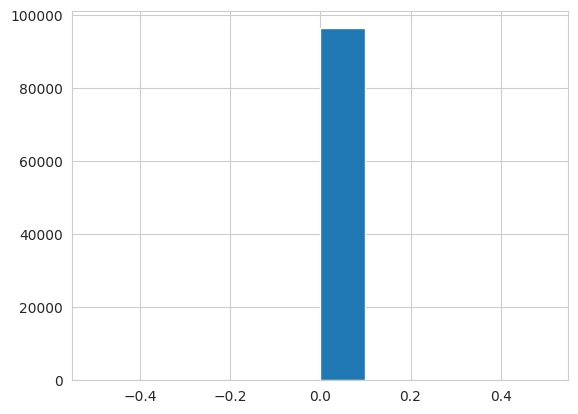

In [ ]:
orders_df.delivery_time.hist()

##### menambahkan kolom nilai “Active” untuk pelanggan yang pernah melakukan order setidaknya sekali dan sebaliknya bernilai “Non Active” untuk pelanggan yang belum pernah melakukan order sama sekali

In [ ]:
print("Menambahkan kolom nilai “Active” untuk pelanggan yang pernah melakukan order setidaknya sekali dan sebaliknya bernilai “Non Active” untuk pelanggan yang belum pernah melakukan order sama sekali")
print("-"*120)
customer_id_in_orders_df =  orders_df.customer_id.tolist()
customers_df["status"] = customers_df["customer_id"].apply(lambda x: "Active" if x in customer_id_in_orders_df else "Non Active")
customers_df.sample(5)

Menambahkan kolom nilai “Active” untuk pelanggan yang pernah melakukan order setidaknya sekali dan sebaliknya bernilai “Non Active” untuk pelanggan yang belum pernah melakukan order sama sekali
------------------------------------------------------------------------------------------------------------------------


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status
18277,3f3102815b8a6a1ad94e102399d6bb03,9b3b3eaa63df7cc2909934af6d2034ba,27580,itatiaia,RJ,Active
23456,156ecab0fc23f6cd5954e5a8bb354ff3,cabf2fb9019cd39fda2002531d473d25,89705,concordia,SC,Active
65500,2b8d8c09f1f53771fcefd8b0e8ae7b60,2206af8118157cf98f8718a823bdf9c7,19814,assis,SP,Active
78019,cf33500c8660f369fe867416807d8a6c,88055311adcee315a7c05930e3849363,12402,pindamonhangaba,SP,Active
97797,2fb24078c13d0689c1a6812d0e36295c,2051da8c86950104ad66748a1024abb8,3579,sao paulo,SP,Active


###### Informasi terkait jumlah pelanggan yang berstatus “Active” dan “Non Active

In [ ]:
print(" informasi terkait jumlah pelanggan yang berstatus “Active” dan “Non Active”")
customers_df.groupby(by="status").customer_id.count()


 informasi terkait jumlah pelanggan yang berstatus “Active” dan “Non Active”


,customer_id
status,
Active,99441


###### menggabungkan keduanya melalui proses join atau merge. (DATA COSTUMER DAN DATA ORDER)

In [ ]:
orders_customers_df = pd.merge(
    left=orders_df,
    right=customers_df,
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)
orders_customers_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,0.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,Active
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,0.0,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,Active
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,0.0,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,Active
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,0.0,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,Active
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,0.0,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,Active


###### informasi terkait jumlah order berdasarkan kota

In [ ]:
print(" informasi terkait jumlah order berdasarkan customer_state")
print("-"*15)
orders_customers_df.groupby(by="customer_state").order_id.nunique().sort_values(ascending=False).reset_index().head(10)

 informasi terkait jumlah order berdasarkan customer_state
---------------


,customer_state,order_id
0,SP,41746
1,RJ,12852
2,MG,11635
3,RS,5466
4,PR,5045
5,SC,3637
6,BA,3380
7,DF,2140
8,ES,2033
9,GO,2020


###### Jumlah order berdasarkan state

In [ ]:
print("Jumlah order berdasarkan state")
print("-"*15)
orders_customers_df.groupby(by="customer_state").order_id.nunique().sort_values(ascending=False)

Jumlah order berdasarkan state
---------------


,order_id
customer_state,
SP,41746
RJ,12852
MG,11635
RS,5466
PR,5045
SC,3637
BA,3380
DF,2140
ES,2033


## **Explore All data**

### Menggabungkan Data

In [93]:
all_data_df = pd.merge(
    left=orders_df,
    right=customers_df,
    how="left",
    on="customer_id"
)
all_data_df.head()


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


In [105]:
all_data_df = pd.merge(
    left= df,
    right=produk_df,
    how="left",
    on="product_id"
)
all_data_df.head()


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,product_height_cm_x,product_width_cm_x,product_category_name_y,product_name_lenght_y,product_description_lenght_y,product_photos_qty_y,product_weight_g_y,product_length_cm_y,product_height_cm_y,product_width_cm_y
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,8.0,13.0,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,8.0,13.0,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,8.0,13.0,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,...,13.0,19.0,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,...,19.0,21.0,automotivo,46.0,232.0,1.0,420.0,24.0,19.0,21.0


## **Visualization & Explanatory Analysis**

###  Bagaimana tren jumlah pesanan harian?


######  Line Chart - Tren jumlah pesanan harian

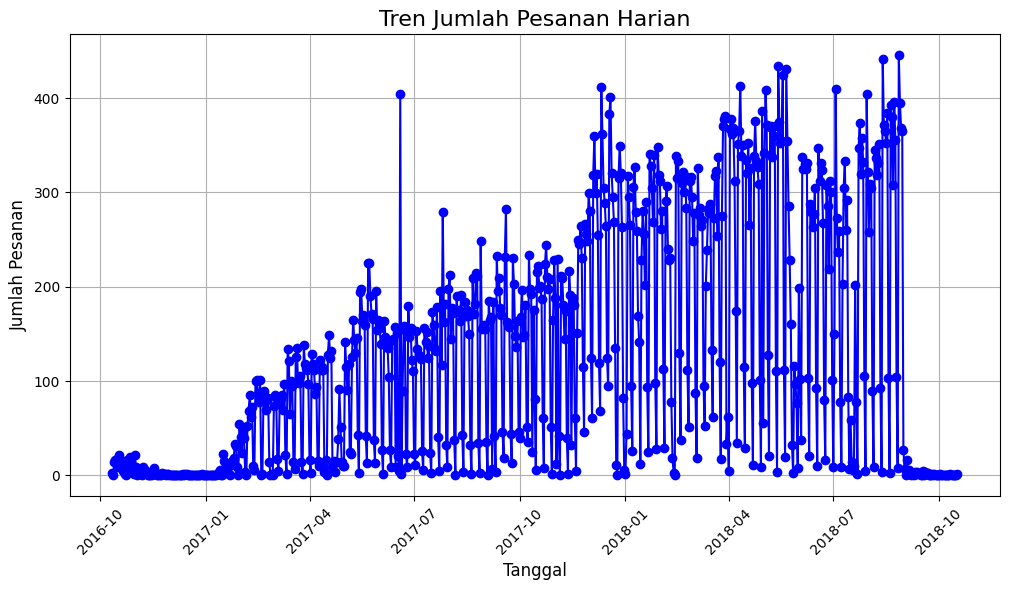

In [ ]:
# Konversi tanggal
df["order_delivered_customer_date"] = pd.to_datetime(df["order_delivered_customer_date"])
# Menghitung jumlah pesanan harian
df_harian = df.resample('D', on="order_delivered_customer_date")["order_id"].nunique().reset_index()

# ===================== VISUALISASI MATPLOTLIB ===================== #
plt.figure(figsize=(12, 6))
plt.plot(df_harian["order_delivered_customer_date"], df_harian["order_id"], marker='o', linestyle='-', color="blue")
plt.title("Tren Jumlah Pesanan Harian", fontsize=16)
plt.xlabel("Tanggal", fontsize=12)
plt.ylabel("Jumlah Pesanan", fontsize=12)
plt.xticks(rotation=45)
plt.grid()
plt.show()

### Produk apa yang paling laris dan kurang laku?


#### Bart chart produk paling laris dan kurang laku

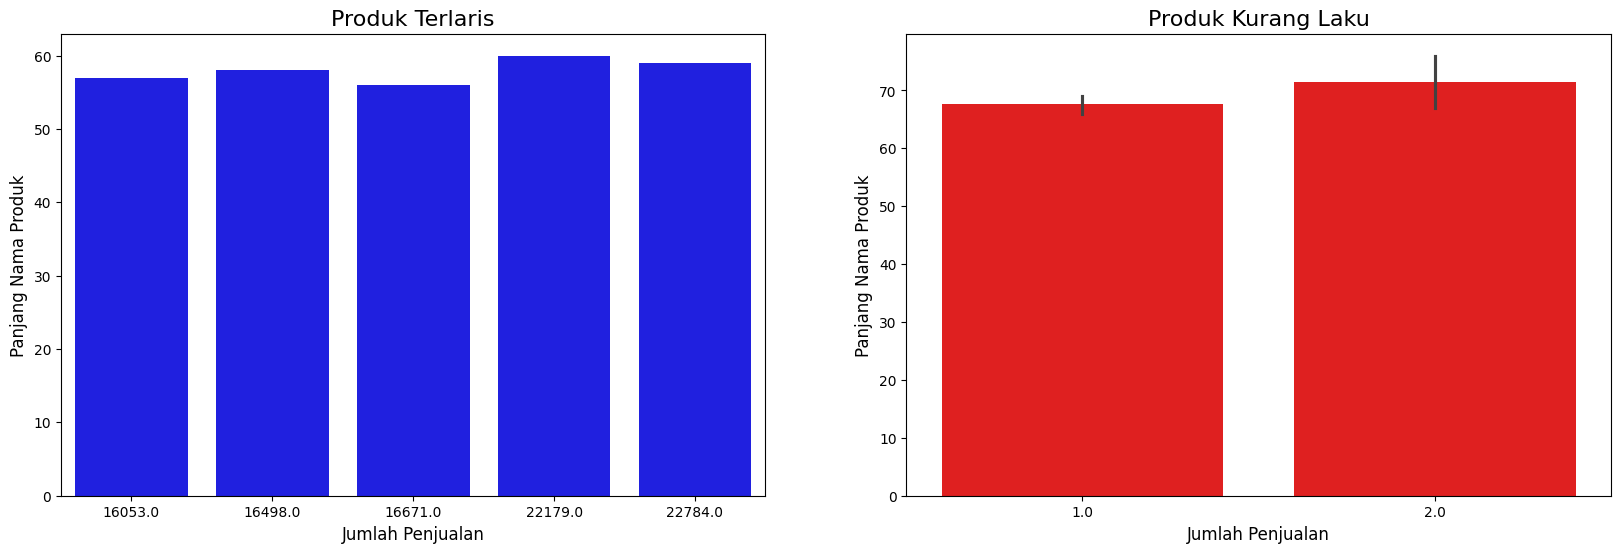

In [ ]:
df_produk = df.groupby("product_name_lenght")["product_photos_qty"].sum().reset_index()
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

# Produk Terlaris (Top 5)
sns.barplot(y="product_name_lenght", x="product_photos_qty", data=df_produk.nlargest(5, "product_photos_qty"), ax=ax[0], color="blue")
ax[0].set_title("Produk Terlaris", fontsize=16)
ax[0].set_xlabel("Jumlah Penjualan", fontsize=12)
ax[0].set_ylabel("Panjang Nama Produk", fontsize=12)

# Produk Kurang Laku (Bottom 5)
sns.barplot(y="product_name_lenght", x="product_photos_qty", data=df_produk.nsmallest(5, "product_photos_qty"), ax=ax[1], color="Red")
ax[1].set_title("Produk Kurang Laku", fontsize=16)
ax[1].set_xlabel("Jumlah Penjualan", fontsize=12)
ax[1].set_ylabel("Panjang Nama Produk", fontsize=12)

plt.show()

### Bagaimana distribusi jumlah pelanggan berdasarkan provinsi?

Bart chart jumlah pelanggan bwdasarkan provinsi

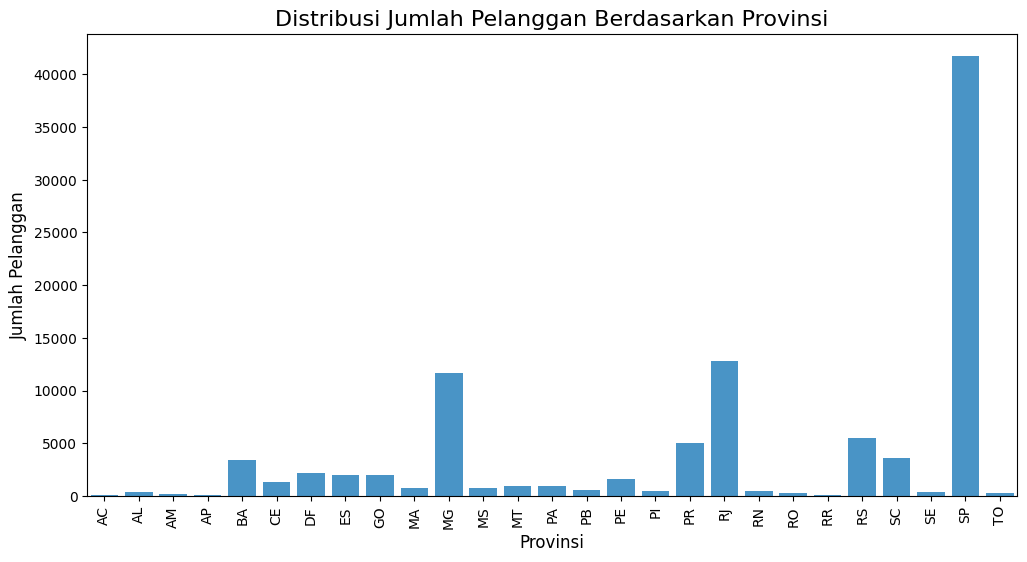

In [ ]:
# ===================== MENGHITUNG JUMLAH PELANGGAN PER PROVINSI ===================== #
df_provinsi = df.groupby("customer_state")["customer_id"].nunique().reset_index()

# ===================== VISUALISASI SEABORN ===================== #
plt.figure(figsize=(12, 6))
sns.barplot(x="customer_state", y="customer_id", data=df_provinsi, color="#3498db")  # Warna biru
plt.title("Distribusi Jumlah Pelanggan Berdasarkan Provinsi", fontsize=16)
plt.xlabel("Provinsi", fontsize=12)
plt.ylabel("Jumlah Pelanggan", fontsize=12)
plt.xticks(rotation=90)
plt.show()


## Conclusion

  - Bagaimana tren jumlah pesanan harian?
  - Produk apa yang paling laris dan kurang laku?
  - Bagaimana distribusi jumlah pelanggan berdasarkan provinsi?

Jawaban pertanyaan 1

In [ ]:
# Menghitung jumlah pesanan per hari
df_harian = df.groupby(df["order_delivered_customer_date"].dt.date)["order_id"].nunique().reset_index()
df_harian.columns = ["Tanggal", "Jumlah Pesanan"]

# Menampilkan hasil
print("=== Tren Jumlah Pesanan Harian ===")
print(df_harian.head(10))  # Menampilkan 10 data pertama

=== Tren Jumlah Pesanan Harian ===
      Tanggal  Jumlah Pesanan
0  2016-10-11               2
1  2016-10-13              14
2  2016-10-14              16
3  2016-10-15              17
4  2016-10-16               8
5  2016-10-17              21
6  2016-10-18              16
7  2016-10-19               9
8  2016-10-20              10
9  2016-10-21               4


Jawaban pertanyaan 2

In [ ]:
# Menghitung jumlah penjualan per produk
df_produk = df.groupby("product_name_lenght")["product_photos_qty"].sum().reset_index()
df_produk.columns = ["Panjang Nama Produk", "Jumlah Terjual"]

# Produk terlaris
produk_terlaris = df_produk.nlargest(5, "Jumlah Terjual")
print("=== Produk Terlaris ===")
print(produk_terlaris)

# Produk kurang laku
produk_kurang_laku = df_produk.nsmallest(5, "Jumlah Terjual")
print("\n=== Produk Kurang Laku ===")
print(produk_kurang_laku)


=== Produk Terlaris ===
    Panjang Nama Produk  Jumlah Terjual
54                 59.0         22784.0
55                 60.0         22179.0
51                 56.0         16671.0
53                 58.0         16498.0
52                 57.0         16053.0

=== Produk Kurang Laku ===
    Panjang Nama Produk  Jumlah Terjual
60                 66.0             1.0
62                 68.0             1.0
63                 69.0             1.0
61                 67.0             2.0
65                 76.0             2.0


Jawaban pertanyaan 3

In [ ]:
# Memuat dataset
df = pd.read_csv("https://raw.githubusercontent.com/wahyunugroho424/proyek-analisis-data/main/data/orders_dataset.csv")

# Mengonversi kolom tanggal menjadi tipe datetime
df["order_purchase_timestamp"] = pd.to_datetime(df["order_purchase_timestamp"])
df["order_delivered_customer_date"] = pd.to_datetime(df["order_delivered_customer_date"])

# Menghitung waktu pengiriman dalam hari
df["delivery_time"] = (df["order_delivered_customer_date"] - df["order_purchase_timestamp"]).dt.days

# Membersihkan data dengan menghapus nilai NaN
df_clean = df.dropna(subset=["delivery_time"])
avg_delivery_time = df_clean["delivery_time"].mean()

print(f"Rata-rata waktu pengiriman pesanan: {avg_delivery_time:.2f} per hari")

Rata-rata waktu pengiriman pesanan: 12.09 per hari


Kesimpulan
- Pesanan Harian: Jumlah pesanan naik turun setiap hari, dengan peningkatan pada hari tertentu, mungkin karena promo atau akhir pekan.
-  Produk Terlaris & Kurang Laku: Ada produk yang sangat laku, sementara yang lain kurang diminati. Perlu strategi untuk meningkatkan penjualan produk yang kurang laku.
- Jumlah Pelanggan per Provinsi: Sebagian besar pelanggan berasal dari beberapa provinsi saja, sementara daerah lain masih sedikit. Ini bisa jadi peluang untuk memperluas pasar.